In [1]:
!pip install -U gif

Requirement already up-to-date: gif in c:\users\aditya-pc\anaconda3\lib\site-packages (3.0.0)


In [4]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        #print('searching: %s'%nb_path)
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        #print('searching: %s' % nb_path)
        if os.path.isfile(nb_path):
            return nb_path

class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        #print('Found %d cells'%len(nb.cells))
        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]


#  register the NotebookFinder with sys.meta_path
print('running importer')
sys.meta_path.append(NotebookFinder())

running importer


# Linear Discriminant Analysis



Also, known as Fisher's LDA, the principle idea behind the algorithm is to reduce the d-dimensional data $\mathbf{x \in R^{d}}$ and map it to one dimension by finding a direction that best separates the projected data $\mathbf{w^{\top}x}$.

![LDA projection](https://drive.google.com/uc?export=view&id=1JbFFNIOQNYmjYuXEwdXl8E8QLBqu8juE)

$\textbf{Goal:}$ Find a direction that best separates projected data $\mathbf{w^{\top}x}$.

Let's consider a two-class problem:

\begin{align}
\mu_0 &= \frac{1}{n_0} \sum_{\mathbf{i:y_i = 0}} \mathbf{x_i} & 
\mu_1 &= \frac{1}{n_1} \sum_{\mathbf{i:y_i = 1}} \mathbf{x_i}
\end{align}

We would like to:


1.   Minimize the within class variance.
2.   Maximize the distance between projected class means.

The distance between projected class means is:

\begin{align}
(\mathbf{w^{\top} \mu_0 - w^{\top} \mu_1})^2 &= (\mathbf{w^{\top} \mu_0 - w^{\top} \mu_1})^{\top} (\mathbf{w^{\top} \mu_0 - w^{\top} \mu_1})\\
&= (\mu_0 - \mu_1)^{\top} \mathbf{w w^{\top}} (\mu_0 - \mu_1)\\
&= \mathbf{w^{\top}} (\mu_0 - \mu_1)^{\top} (\mu_0 - \mu_1) \mathbf{w}\\
&= \mathbf{w^{\top}} S_B \mathbf{w}
\end{align}

where $S_B$ is the between-class variance.

Minimizing the within-class variance is equivalent to minimizing the sum of all individual within-class variances. Thus, the within-class variance is:

\begin{align}
\mathbf{w^{\top} \Sigma_0 w + w^{\top} \Sigma_1 w} &= \mathbf{w^{\top} (\Sigma_0 + \Sigma_1) w}\\
&= \mathbf{w^{\top}} S_W \mathbf{w}
\end{align}

where $S_W$ is the within-class variance.

Hence, our optimization goal becomes:

\begin{equation}
\max_\mathbf{w} \frac{\mathbf{w^{\top}} S_B \mathbf{w}}{\mathbf{w^{\top}} S_W \mathbf{w}}
\end{equation}

Note that $\mathbf{w}$ is unbounded. We can convert the objective function into a constrained optimization goal using Lagrange multipliers.

Our optimization will be subject to the constraint, $\mathbf{w^{\top}} S_W \mathbf{w} = 1$.

\begin{equation}
\phi(\mathbf{w}, \lambda) = \mathbf{w^{\top}} S_B \mathbf{w} - \lambda(\mathbf{w^{\top}} S_W \mathbf{w} - 1)
\end{equation}

Differentiating w.r.t $\mathbf{w}$ we get:

\begin{align}
\frac{\partial \phi}{\partial \mathbf{w}} = 2 \cdot S_B \cdot \mathbf{w} - \lambda \cdot 2 \cdot S_W \cdot \mathbf{w} &= 0\\
S_B \mathbf{w} &= \lambda \cdot S_W \cdot \mathbf{w}
\end{align}

Therefore, the generalized eigenvector problem is:

\begin{equation}
S_W^{-1} S_B \mathbf{w} = \lambda \mathbf{w}
\end{equation}

where $\lambda$ and $\mathbf{w}$ are the eigenvalues and eigenvectors of $S_W^{-1} S_B$ respectively.

A simplified solution for two-class problem is:

\begin{equation}
S_W^{-1} (\mu_0 - \mu_1) \propto \mathbf{w}
\end{equation}

where $S_B = \mu_0 - \mu_1$.

## LDA - Binary classification on Partially separable dataset

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set();
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import pi

from utils import get_accuracy, get_prediction, plot_decision_boundary, generate_gifs
from utils import plot_2D_input_datapoints, signum, multi_class_signum, normalize

importing Jupyter notebook from utils.ipynb


In [6]:
plt.figure(figsize=(8,8));

np.random.seed(20)

# Generating a dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)

# Absorbing weight b of the hyperplane
b_ones = np.ones((len(X), 1))
X = np.hstack((X, b_ones))

y = y.reshape((-1, 1))

<Figure size 576x576 with 0 Axes>

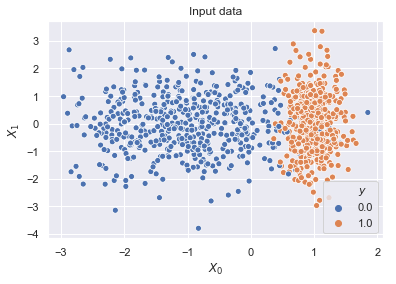

In [7]:
plot_2D_input_datapoints(X[:, :2], y)

In [8]:
# Train-Val-Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, shuffle=True, test_size = 0.2)

print("Training dataset: ", X_train.shape)
print("Test dataset: ", X_test.shape)

Training dataset:  (800, 3)
Test dataset:  (200, 3)


In [9]:
# Normalizing X_train and absorbing weight b of the hyperplane
X_normalized_train = normalize(X_train[:, :2])

b_ones = np.ones((len(X_normalized_train), 1))
X_normalized_train = np.hstack((X_normalized_train, b_ones))

In [10]:
# Calculating covariance of an input matrix
def calc_cov_matrix(X_input):
  n_samples = np.shape(X_input)[0]
  cov_matrix = np.array((1 / (n_samples-1)) * (X_input - X_input.mean(axis=0)).T.dot(X_input - X_input.mean(axis=0)))

  return cov_matrix

Before we dive in the train method, let us look at the pseudo code.

Given a dataset $D = (x_i, y_i)_{i=1}^n$ and class labels $i = 0, 1$.

1.  Collecting class-specific dataset. $D_i = \{x_j | y_j = c_i; j = 1, 2, ...., n\}$
2.  Calcualte class-specific means, $\mu_i = mean(D_i)$.
3.  Calculate between class scatter matrix, $S_B = (\mu_0 - \mu_1)(\mu_0 - \mu_1)^{\top}$
4.  Center class-specific dataset using class-specific means, $Z_i = D_i - 1_{n_i} \mu_i^{\top}$
5.  Compute class-specific scatter matrices, $S_i = Z_i^{\top} Z_i$
6.  Compute within scatter matrix, $S_W = S_0 + S_1$
7.  Compute dominant eigenvector, $\lambda_1, w = eigen(S_W^{-1} S_B)$

In [11]:
def train(X_train, y_train):

  """Train method for LDA.

  Parameters
  -----------
  X_train: ndarray (num_examples(rows) vs num_features(columns))
   Input dataset which LDA will use to obtain optimal weights during training

  y_train: ndarray (num_examples(rows) vs class_labels(columns))
  """
  
  # Collecting all class 0 and class 1 into separate variables
  class_X0 = X_train[np.argwhere(y_train == 0)[:, 0]]
  class_X1 = X_train[np.argwhere(y_train == 1)[:, 0]]

  # Getting number of examples in each class
  num_class_X0_samples = np.shape(class_X0)[0]
  num_class_X1_samples = np.shape(class_X1)[0]

  # Computing class mean for each label and calculating the difference between them.
  class_X0_mean = class_X0.mean(0)
  class_X1_mean = class_X1.mean(0)
  class_mean_diff = class_X1_mean - class_X0_mean
  class_mean_diff = class_mean_diff.reshape((-1, 1))
  SB = np.dot(class_mean_diff, class_mean_diff.T)

  # Calculating covariance matrix
  cov_mat_class_X0 = calc_cov_matrix(class_X0)
  cov_mat_class_X1 = calc_cov_matrix(class_X1)
  #SW = num_class_X0_samples * cov_mat_class_X0 + num_class_X0_samples * cov_mat_class_X1
  SW = cov_mat_class_X0 + cov_mat_class_X1

  eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(SW).dot(SB))

  # Getting the eigenvectors with the maximum eigenvalue.
  idx = eigvals.argsort()[::-1]
  eigvals = eigvals[idx][:1]
  weights = np.atleast_1d(eigvecs[:, idx])[:, :1]

  return weights

In [12]:
trained_weights = train(X_normalized_train, Y_train)

In [13]:
trained_weights ,  

array([[0.99999498],
       [0.00317002],
       [0.        ]])

In [11]:
# Predict on test set
num_test_samples = np.shape(Y_test)[0]

y_test_predicted = np.dot(X_test, trained_weights)
y_test_predicted[y_test_predicted >= 0] = 1
y_test_predicted[y_test_predicted < 0] = 0

y_test_predicted = y_test_predicted.reshape((-1, 1))
Y_test = Y_test.reshape((-1, 1))

# Getting misclassfied points on test set
miscls_test_points = np.unique(np.argwhere(y_test_predicted != Y_test)[:, 0])
accuracy = 1-(len(miscls_test_points)/num_test_samples)
print("Accuracy: ", accuracy*100)

Accuracy:  93.5


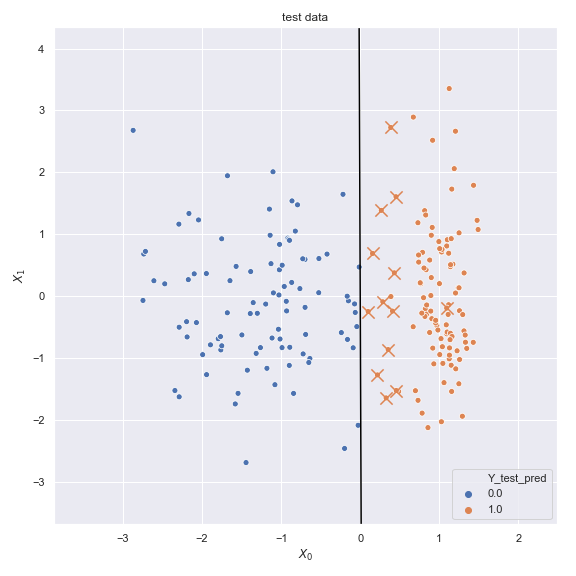

In [12]:
plot_decision_boundary(X_test, Y_test, trained_weights, dataset_type='test', class_label_01_form='on', model_type='LinearDA')